In [9]:
import pandas as pd

# Tentukan nama file CSV Anda
file_path = '[SERI 2010] PDRB Atas Dasar Harga Berlaku Menurut Pengeluaran Kabupaten_Kota, 2024.csv'

# Muat file CSV, dengan memberitahu pandas bahwa header (nama kolom) ada di baris ke-3
df = pd.read_csv(file_path, header=2)

print("✅ File berhasil dimuat. Tampilan 5 baris pertama data mentah:")
df.head()

✅ File berhasil dimuat. Tampilan 5 baris pertama data mentah:


,Unnamed: 0,Pengeluaran Konsumsi Rumah Tangga,Pengeluaran Konsumsi LNPRT,Pengeluaran Konsumsi Pemerintah,Pembentukan Modal Tetap Bruto,Perubahan Inventori,Net Ekspor,PDRB
0,NaN,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00,2024.00
1,Simeulue,2015.09,126.34,860.99,1264.84,0.37,-1116.88,3150.76
2,Aceh Singkil,2022.17,65.02,1036.79,1031.58,4.48,-718.96,3441.08
3,Aceh Selatan,4505.19,145.72,1397.89,2527.03,3.10,-1112.70,7466.23
4,Aceh Tenggara,4622.99,279.49,1522.39,1810.66,50.04,-1547.70,6737.89


In [10]:
# 1. Ganti nama kolom pertama yang kosong ('Unnamed: 0') menjadi 'Kabupaten/Kota'
df = df.rename(columns={'Unnamed: 0': 'Kabupaten/Kota'})

# 2. Hapus baris pertama (indeks 0) yang berisi teks '2024'
df = df.drop(df.index[0])

# 3. Reset index agar urutannya kembali dari 0 setelah menghapus baris
df = df.reset_index(drop=True)

# 4. Hapus baris yang semua nilainya kosong (biasanya ada di akhir file BPS)
df = df.dropna(how='all')

print("✅ Kolom dan baris berhasil dibersihkan. Tampilan 5 baris pertama data bersih:")
df.head()

✅ Kolom dan baris berhasil dibersihkan. Tampilan 5 baris pertama data bersih:


,Kabupaten/Kota,Pengeluaran Konsumsi Rumah Tangga,Pengeluaran Konsumsi LNPRT,Pengeluaran Konsumsi Pemerintah,Pembentukan Modal Tetap Bruto,Perubahan Inventori,Net Ekspor,PDRB
0,Simeulue,2015.09,126.34,860.99,1264.84,0.37,-1116.88,3150.76
1,Aceh Singkil,2022.17,65.02,1036.79,1031.58,4.48,-718.96,3441.08
2,Aceh Selatan,4505.19,145.72,1397.89,2527.03,3.10,-1112.70,7466.23
3,Aceh Tenggara,4622.99,279.49,1522.39,1810.66,50.04,-1547.70,6737.89
4,Aceh Timur,10083.42,437.77,1757.04,4725.17,-1.08,-2066.98,14935.34


In [11]:
# 1. Tentukan kolom mana saja yang seharusnya berisi angka
kolom_angka = [
    'Pengeluaran Konsumsi Rumah Tangga',
    'Pengeluaran Konsumsi LNPRT',
    'Pengeluaran Konsumsi Pemerintah',
    'Pembentukan Modal Tetap Bruto',
    'Perubahan Inventori',
    'Net Ekspor',
    'PDRB'
]

# 2. Loop melalui setiap kolom angka dan ubah tipenya menjadi numerik
for kolom in kolom_angka:
    # pd.to_numeric akan mengubah teks menjadi angka.
    # errors='coerce' akan mengubah nilai yang tidak bisa diubah (misal: teks '-') menjadi kosong (NaN)
    df[kolom] = pd.to_numeric(df[kolom], errors='coerce')

print("✅ Tipe data berhasil diubah menjadi numerik. Cek info DataFrame di bawah:")
df.info()

✅ Tipe data berhasil diubah menjadi numerik. Cek info DataFrame di bawah:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Kabupaten/Kota                     514 non-null    object 
 1   Pengeluaran Konsumsi Rumah Tangga  514 non-null    float64
 2   Pengeluaran Konsumsi LNPRT         514 non-null    float64
 3   Pengeluaran Konsumsi Pemerintah    514 non-null    float64
 4   Pembentukan Modal Tetap Bruto      514 non-null    float64
 5   Perubahan Inventori                514 non-null    float64
 6   Net Ekspor                         514 non-null    float64
 7   PDRB                               514 non-null    float64
dtypes: float64(7), object(1)
memory usage: 32.3+ KB


In [12]:
import pandas as pd

# --- BAGIAN 1: Pembersihan Data ---
# Ganti dengan nama file Anda jika berbeda
file_path = '[SERI 2010] PDRB Atas Dasar Harga Berlaku Menurut Pengeluaran Kabupaten_Kota, 2024.csv'

# Muat file CSV, atur baris header dengan benar
df = pd.read_csv(file_path, header=2)

# Ganti nama kolom dan bersihkan baris yang tidak perlu
df = df.rename(columns={'Unnamed: 0': 'Kabupaten/Kota'})
df = df.drop(df.index[0]) # Hapus baris '2024'
df = df.reset_index(drop=True)
df = df.dropna(how='all') # Hapus baris kosong di akhir

# Tentukan kolom numerik dan ubah tipe datanya
kolom_angka = [
    'Pengeluaran Konsumsi Rumah Tangga', 'Pengeluaran Konsumsi LNPRT',
    'Pengeluaran Konsumsi Pemerintah', 'Pembentukan Modal Tetap Bruto',
    'Perubahan Inventori', 'Net Ekspor', 'PDRB'
]
for kolom in kolom_angka:
    df[kolom] = pd.to_numeric(df[kolom], errors='coerce')

# --- BAGIAN 2: Analisis - Mencari 10 PDRB Tertinggi ---

# Urutkan DataFrame berdasarkan kolom 'PDRB' dari terbesar ke terkecil
df_sorted = df.sort_values(by='PDRB', ascending=False)

# Ambil 10 baris teratas
top_10_pdrb = df_sorted.head(10)

# Tampilkan hasilnya dengan format tabel yang rapi
print("✅ Berikut adalah 10 Kabupaten/Kota dengan PDRB (Milyar Rupiah) tertinggi:")
print(top_10_pdrb[['Kabupaten/Kota', 'PDRB']].to_string(index=False))

✅ Berikut adalah 10 Kabupaten/Kota dengan PDRB (Milyar Rupiah) tertinggi:
      Kabupaten/Kota      PDRB
  Kota Jakarta Pusat 922861.05
Kota Jakarta Selatan 850297.02
       Kota Surabaya 772493.61
  Kota Jakarta Utara 670179.09
  Kota Jakarta Timur 630608.92
  Kota Jakarta Barat 627869.62
              Bekasi 421323.53
        Kota Bandung 371845.62
          Kota Medan 329609.17
               Bogor 311713.18


✅ Data berhasil diproses. Menampilkan visualisasi...


C:\Users\awros\AppData\Local\Temp\ipykernel_14180\1217424343.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PDRB', y='Kabupaten/Kota', data=top_10_pdrb, palette='viridis')


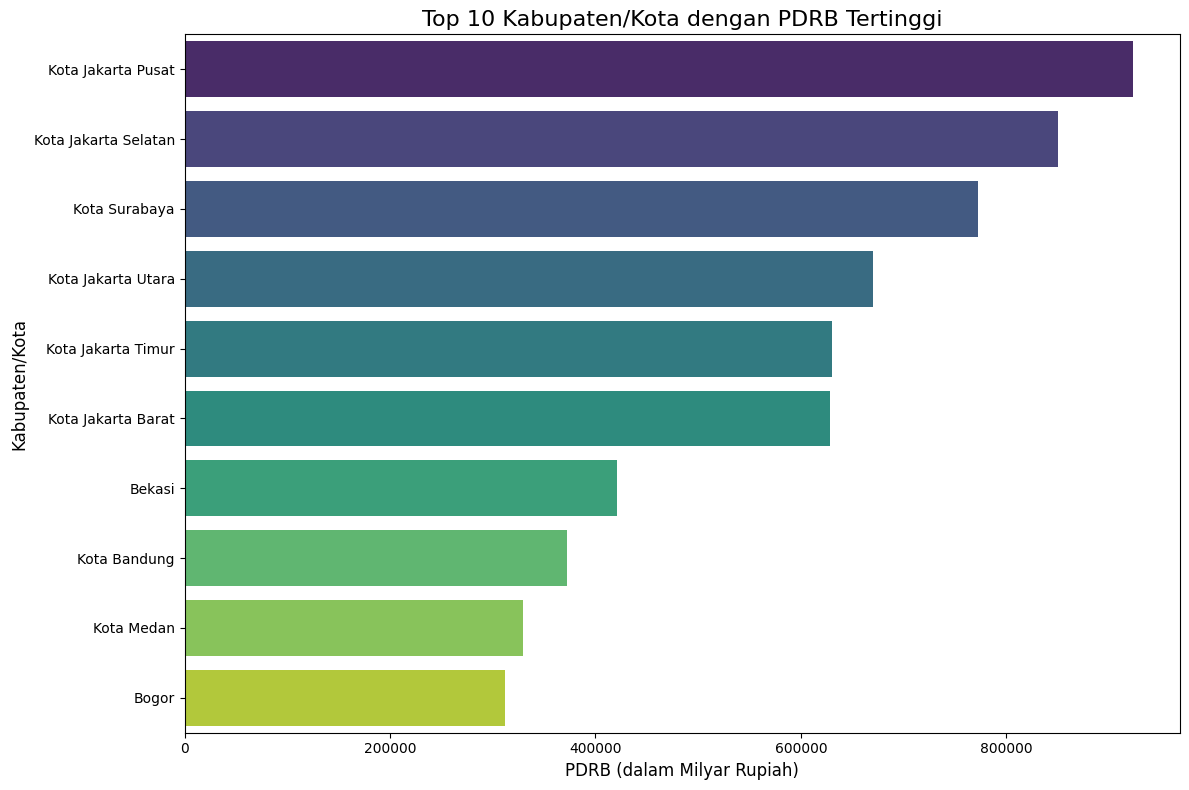

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- BAGIAN 1: Pembersihan Data ---
# Pastikan nama file ini sama persis dengan file di folder Anda
file_path = '[SERI 2010] PDRB Atas Dasar Harga Berlaku Menurut Pengeluaran Kabupaten_Kota, 2024.csv'

# Muat, bersihkan, dan perbaiki tipe data
df = pd.read_csv(file_path, header=2)
df = df.rename(columns={'Unnamed: 0': 'Kabupaten/Kota'})
df = df.drop(df.index[0])
df = df.reset_index(drop=True)
df = df.dropna(how='all')

kolom_angka = [
    'Pengeluaran Konsumsi Rumah Tangga', 'Pengeluaran Konsumsi LNPRT',
    'Pengeluaran Konsumsi Pemerintah', 'Pembentukan Modal Tetap Bruto',
    'Perubahan Inventori', 'Net Ekspor', 'PDRB'
]
for kolom in kolom_angka:
    df[kolom] = pd.to_numeric(df[kolom], errors='coerce')

# --- BAGIAN 2: Analisis - Mencari 10 PDRB Tertinggi ---
top_10_pdrb = df.sort_values(by='PDRB', ascending=False).head(10)

# --- BAGIAN 3: Visualisasi ---
print("✅ Data berhasil diproses. Menampilkan visualisasi...")

# Atur ukuran gambar (opsional, agar lebih besar)
plt.figure(figsize=(12, 8))

# Buat bar plot dengan Seaborn untuk tampilan yang lebih menarik
sns.barplot(x='PDRB', y='Kabupaten/Kota', data=top_10_pdrb, palette='viridis')

# Tambahkan judul dan label untuk memperjelas grafik
plt.title('Top 10 Kabupaten/Kota dengan PDRB Tertinggi', fontsize=16)
plt.xlabel('PDRB (dalam Milyar Rupiah)', fontsize=12)
plt.ylabel('Kabupaten/Kota', fontsize=12)

# Tampilkan plotnya
plt.tight_layout() # Merapikan layout agar tidak ada teks yang tumpang tindih
plt.show()

✅ Data berhasil diproses. Menampilkan visualisasi komposisi ekonomi...


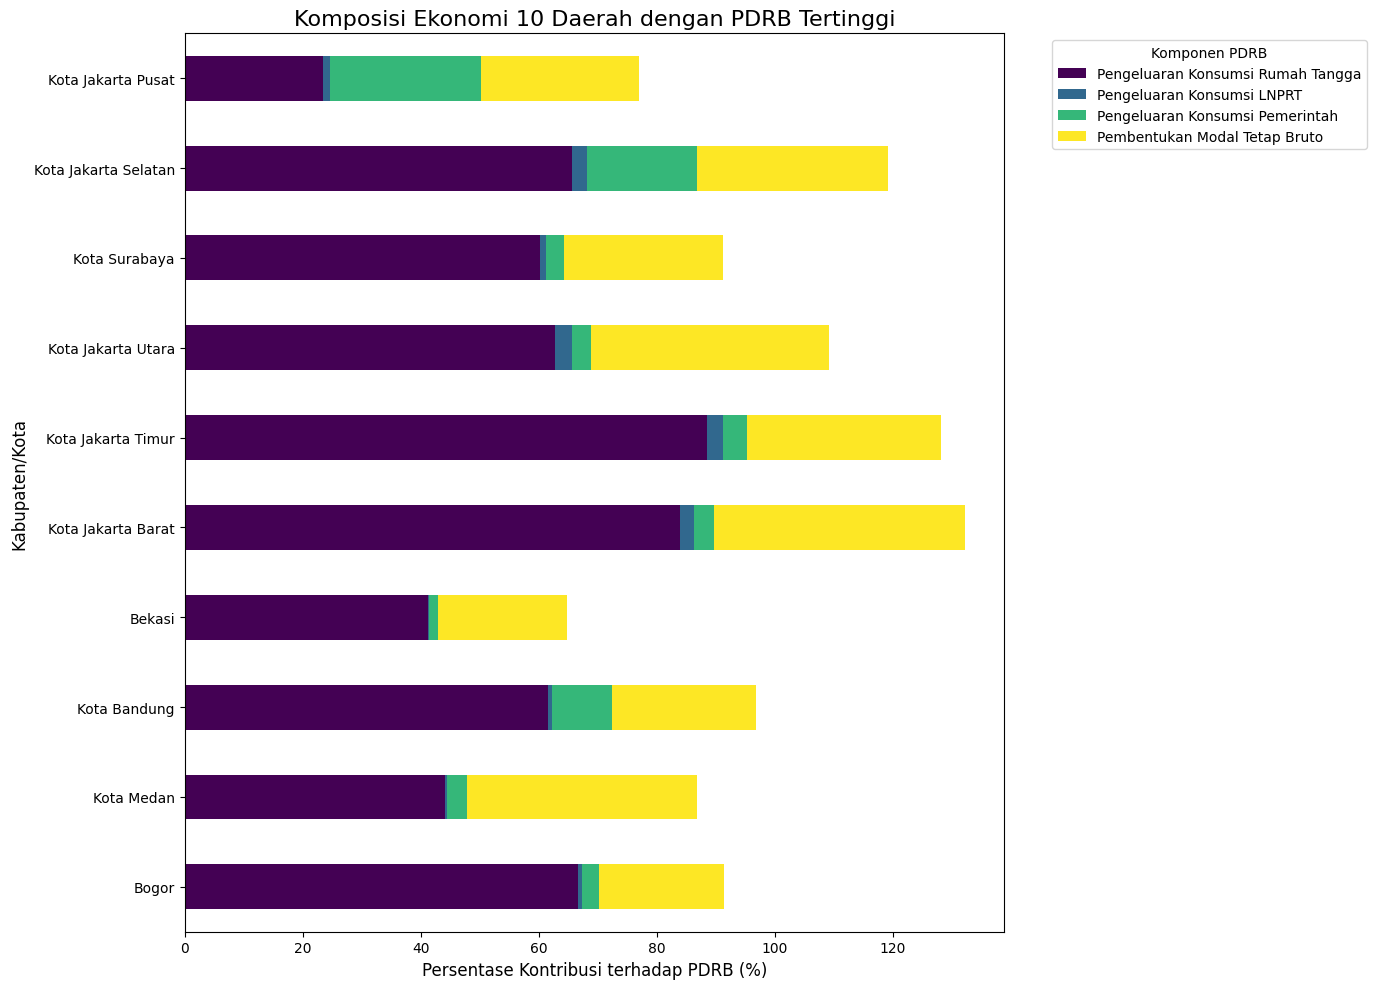

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- BAGIAN 1: Pembersihan dan Persiapan Data ---
file_path = '[SERI 2010] PDRB Atas Dasar Harga Berlaku Menurut Pengeluaran Kabupaten_Kota, 2024.csv'

df = pd.read_csv(file_path, header=2)
df = df.rename(columns={'Unnamed: 0': 'Kabupaten/Kota'})
df = df.drop(df.index[0])
df = df.reset_index(drop=True)
df = df.dropna(how='all')

kolom_angka = [
    'Pengeluaran Konsumsi Rumah Tangga', 'Pengeluaran Konsumsi LNPRT',
    'Pengeluaran Konsumsi Pemerintah', 'Pembentukan Modal Tetap Bruto',
    'Perubahan Inventori', 'Net Ekspor', 'PDRB'
]
for kolom in kolom_angka:
    df[kolom] = pd.to_numeric(df[kolom], errors='coerce')

# --- BAGIAN 2: Menemukan 10 Daerah Teratas ---
top_10_df = df.sort_values(by='PDRB', ascending=False).head(10)

# --- BAGIAN 3: Menghitung Persentase Komposisi Ekonomi ---
# Pilih kolom komponen utama yang ingin dianalisis.
# Kita fokus pada pengeluaran utama yang positif.
komponen = [
    'Pengeluaran Konsumsi Rumah Tangga',
    'Pengeluaran Konsumsi LNPRT',
    'Pengeluaran Konsumsi Pemerintah',
    'Pembentukan Modal Tetap Bruto'
]

# Buat DataFrame baru khusus untuk menampung data persentase
df_percent = top_10_df[['Kabupaten/Kota']].copy()

# Hitung persentase setiap komponen terhadap total PDRB
for kolom in komponen:
    df_percent[kolom] = (top_10_df[kolom] / top_10_df['PDRB']) * 100

# --- BAGIAN 4: Visualisasi dengan Stacked Bar Chart ---
print("✅ Data berhasil diproses. Menampilkan visualisasi komposisi ekonomi...")

# Atur 'Kabupaten/Kota' sebagai index agar menjadi label pada sumbu Y
plot_data = df_percent.set_index('Kabupaten/Kota')

# Buat plot. 'barh' untuk horizontal bar, 'stacked=True' untuk menumpuknya
plot_data.plot(kind='barh', stacked=True, figsize=(14, 10), colormap='viridis')

# Kustomisasi plot agar lebih informatif
plt.title('Komposisi Ekonomi 10 Daerah dengan PDRB Tertinggi', fontsize=16)
plt.xlabel('Persentase Kontribusi terhadap PDRB (%)', fontsize=12)
plt.ylabel('Kabupaten/Kota', fontsize=12)
plt.legend(title='Komponen PDRB', bbox_to_anchor=(1.05, 1), loc='upper left') # Pindahkan legenda ke luar plot
plt.gca().invert_yaxis() # Membalik urutan agar yang tertinggi ada di atas
plt.tight_layout()
plt.show()